# Importación de librerías

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   # para modelos de regresion lineal
from sklearn.linear_model import Ridge   # Ridge regression
from sklearn.linear_model import Lasso   # Lasso regression
from sklearn.linear_model import ElasticNet  # ElasticNet regression
from sklearn.neighbors import KNeighborsRegressor  # Knn regression
from sklearn.tree import DecisionTreeRegressor   # Decision Trees regression

In [3]:
# prompt: importar xgb

from xgboost import XGBRegressor  # XGBoost regression
import xgboost as xgb

In [4]:
def make_boxplot(dataframe):
    # Número de columnas numéricas
    num_columns = dataframe.select_dtypes(include=['float64', 'int64']).shape[1]

    # Configura el tamaño de la figura para acomodar todos los subplots
    plt.figure(figsize=(5 * num_columns, 4))

    # Itera sobre las columnas numéricas para crear un boxplot para cada una
    for i, column in enumerate(dataframe.select_dtypes(include=['float64', 'int64']).columns):
        plt.subplot(1, num_columns, i + 1)  # (1, num_columns, index)
        dataframe[column].plot(kind='box', grid=True)
        plt.title(column)

    plt.show()

In [5]:
def encode_categorical_column(dataframe, columns=None, encoding_type='LabelEncoder'):
    """
    Encodes a categorical column in the dataframe to numeric format using the specified encoding type.
    """
    if columns is None:
        columns = dataframe.select_dtypes(include=['object', 'category']).columns

    if encoding_type not in ['LabelEncoder', 'OneHotEncoder']:
        raise ValueError("encoding_type must be  'LabelEncoder', or 'OneHotEncoder'")

    for column in columns:

        if encoding_type == 'LabelEncoder':
            # Use LabelEncoder for label encoding
            le = LabelEncoder()
            dataframe[column] = le.fit_transform(dataframe[column])
        elif encoding_type == 'OneHotEncoder':
            # Use OneHotEncoder from scikit-learn for one-hot encoding
            dataframe.reset_index(inplace=True)
            ohe = OneHotEncoder(sparse_output=False)
            encoded_features = ohe.fit_transform(dataframe[[column]])
            encoded_feature_names = ohe.get_feature_names_out(input_features=[column])
            dataframe = pd.concat([dataframe.drop(column, axis=1), pd.DataFrame(encoded_features, columns=encoded_feature_names)], axis=1)

    return dataframe

In [6]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Exploración de datos

In [7]:
### Conectar con Google Drive :
# drive.mount('/content/drive')
# Lista de archivos
path = '/content/drive/MyDrive/TODO/PUCP/Ciclo 10/INTELIGENCIA ARTIFICIAL/PROYECTO/dataset.csv'
data = pd.read_csv(path)
data.head(5)

,FECHA_CORTE,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,...,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,UBIGEO_ULT_ATE,DEPARTAMENTO_ULT_ATE,PROVINCIA_ULT_ATE,DISTRITO_ULT_ATE,NIVEL_ULT_ATE
0,20240426,20230331,52BAEBEF1D09B9768E7B4CF5B3513538B2C45E06EF861F...,65,70106,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA,FEMENINO,20220620,...,0,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN
1,20240426,20230331,7FD6261B4EA46FF607C1BA139B94C73CC0446E2FC7B877...,13,80907,CUSCO,LA CONVENCIÓN,KIMBIRI,MASCULINO,20221001,...,0,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN
2,20240426,20230331,FFBE798BE21A94EB56BB8A0B7FBDEC07AFB8824A688294...,96,150701,LIMA,HUAROCHIRÍ,MATUCANA,FEMENINO,20191216,...,0,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN
3,20240426,20230331,A063A90D386099DDBD7AEA15F5F2A96FDCA3B2E326A02C...,60,20801,ÁNCASH,CASMA,CASMA,FEMENINO,20191216,...,0,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN
4,20240426,20230331,648654B6F9D7538441DAA9987966AD163941F0755C809B...,56,70101,CALLAO,PROV. CONST. DEL CALLAO,CALLAO,MASCULINO,20181029,...,1,17.73,0,0.0,0,70101.0,CALLAO,PROV. CONST. DEL CALLAO,CALLAO,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735940 entries, 0 to 1735939
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   FECHA_CORTE           int64  
 1   FECHA_AFILIADOS_SIS   int64  
 2   CODIGO_ANONIMIZADO    object 
 3   EDAD                  int64  
 4   UBIGEO                int64  
 5   DEPARTAMENTO          object 
 6   PROVINCIA             object 
 7   DISTRITO              object 
 8   SEXO                  object 
 9   FECHA_PRIMER_DX       int64  
 10  TIPO_DIABETES         object 
 11  CON_DX_OBESIDAD       object 
 12  CON_DX_HIPERTENSION   object 
 13  CON_DX_SALUDMENTAL    object 
 14  CANT_ATENCIONES       int64  
 15  VALOR_NETO            float64
 16  CANT_ATENCIONES_HOSP  int64  
 17  VALOR_NETO_HOSP       float64
 18  DIAS_HOSP             int64  
 19  UBIGEO_ULT_ATE        float64
 20  DEPARTAMENTO_ULT_ATE  object 
 21  PROVINCIA_ULT_ATE     object 
 22  DISTRITO_ULT_ATE      object 
 23  NIVEL_U

In [9]:
data.shape

(1735940, 24)

In [10]:
missing_values_table(data)

Your selected dataframe has 24 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
CON_DX_SALUDMENTAL,1357231,78.2
NIVEL_ULT_ATE,1214444,70.0
UBIGEO_ULT_ATE,1214440,70.0
DEPARTAMENTO_ULT_ATE,1214440,70.0
PROVINCIA_ULT_ATE,1214440,70.0
DISTRITO_ULT_ATE,1214440,70.0
CON_DX_HIPERTENSION,1080678,62.3
CON_DX_OBESIDAD,633509,36.5


In [11]:
### Contabilizar vacios de cada columna
data.isnull().sum()

FECHA_CORTE                   0
FECHA_AFILIADOS_SIS           0
CODIGO_ANONIMIZADO            0
EDAD                          0
UBIGEO                        0
DEPARTAMENTO                  0
PROVINCIA                     0
DISTRITO                      0
SEXO                          0
FECHA_PRIMER_DX               0
TIPO_DIABETES                 0
CON_DX_OBESIDAD          633509
CON_DX_HIPERTENSION     1080678
CON_DX_SALUDMENTAL      1357231
CANT_ATENCIONES               0
VALOR_NETO                    0
CANT_ATENCIONES_HOSP          0
VALOR_NETO_HOSP               0
DIAS_HOSP                     0
UBIGEO_ULT_ATE          1214440
DEPARTAMENTO_ULT_ATE    1214440
PROVINCIA_ULT_ATE       1214440
DISTRITO_ULT_ATE        1214440
NIVEL_ULT_ATE           1214444
dtype: int64

In [12]:
### Contabilizar vacios de cada columna mas porcentaje
vacios = pd.DataFrame(data.isnull().sum()).sort_values(0,ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios']/data.shape[0], 4)*100
vacios

,vacios,vacios%
FECHA_CORTE,0,0.00
FECHA_AFILIADOS_SIS,0,0.00
CODIGO_ANONIMIZADO,0,0.00
EDAD,0,0.00
UBIGEO,0,0.00
DEPARTAMENTO,0,0.00
PROVINCIA,0,0.00
DISTRITO,0,0.00
SEXO,0,0.00
FECHA_PRIMER_DX,0,0.00


# Preprocesamiento

In [13]:
# prompt: dropear columnas con vacios
data2 = data.drop(['CON_DX_OBESIDAD','CON_DX_HIPERTENSION','DISTRITO_ULT_ATE','UBIGEO_ULT_ATE','DEPARTAMENTO_ULT_ATE','PROVINCIA_ULT_ATE','NIVEL_ULT_ATE','CON_DX_SALUDMENTAL'],axis=1)
data2

,FECHA_CORTE,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP
0,20240426,20230331,52BAEBEF1D09B9768E7B4CF5B3513538B2C45E06EF861F...,65,70106,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA,FEMENINO,20220620,Diabetes mellitus no especificada,0,0.00,0,0.0,0
1,20240426,20230331,7FD6261B4EA46FF607C1BA139B94C73CC0446E2FC7B877...,13,80907,CUSCO,LA CONVENCIÓN,KIMBIRI,MASCULINO,20221001,Diabetes mellitus tipo 2,0,0.00,0,0.0,0
2,20240426,20230331,FFBE798BE21A94EB56BB8A0B7FBDEC07AFB8824A688294...,96,150701,LIMA,HUAROCHIRÍ,MATUCANA,FEMENINO,20191216,Diabetes mellitus tipo 2,0,0.00,0,0.0,0
3,20240426,20230331,A063A90D386099DDBD7AEA15F5F2A96FDCA3B2E326A02C...,60,20801,ÁNCASH,CASMA,CASMA,FEMENINO,20191216,Diabetes mellitus tipo 1,0,0.00,0,0.0,0
4,20240426,20230331,648654B6F9D7538441DAA9987966AD163941F0755C809B...,56,70101,CALLAO,PROV. CONST. DEL CALLAO,CALLAO,MASCULINO,20181029,Diabetes mellitus no especificada,1,17.73,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735935,20240426,20230930,8901E038224E208767C844F48C7AB00D05AD0B60195142...,69,150110,LIMA,LIMA,COMAS,FEMENINO,20190321,Diabetes mellitus tipo 2,1,0.00,0,0.0,0
1735936,20240426,20230930,45F1C639360C47494A47168F344B7062AA5FD1CB2088FF...,70,150142,LIMA,LIMA,VILLA EL SALVADOR,MASCULINO,20201214,Diabetes mellitus tipo 2,1,0.00,0,0.0,0
1735937,20240426,20230930,0CA391BA96FE0EDF34B0D89013C313ABED7BEC5FA814BB...,53,200806,PIURA,SECHURA,RINCONADA LLICUAR,FEMENINO,20180716,Diabetes mellitus tipo 2,1,0.00,0,0.0,0
1735938,20240426,20230930,5B1849A9E05FEDADCF707A23054680EFA590E3584603F8...,65,150135,LIMA,LIMA,SAN MARTÍN DE PORRES,MASCULINO,20201219,Diabetes mellitus tipo 2,1,0.00,0,0.0,0


In [14]:
missing_values_table(data2)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [15]:
data3 = data.dropna()
data3

,FECHA_CORTE,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,...,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,UBIGEO_ULT_ATE,DEPARTAMENTO_ULT_ATE,PROVINCIA_ULT_ATE,DISTRITO_ULT_ATE,NIVEL_ULT_ATE
19,20240426,20230331,E2C09B4B1F2A7C83B9A4DAA5C0FE98CAF88A72A0BE3C85...,67,130704,LA LIBERTAD,PACASMAYO,PACASMAYO,FEMENINO,20200904,...,4,132.85,0,0.0,0,130704.0,LA LIBERTAD,PACASMAYO,PACASMAYO,2.0
38,20240426,20230331,AAFCB807C7EF2EFF98CF19C873FFE71DC9C5962582C009...,70,150101,LIMA,LIMA,LIMA,FEMENINO,20190313,...,1,0.48,0,0.0,0,150101.0,LIMA,LIMA,LIMA,1.0
50,20240426,20230331,6BB7802442C9C21587152DCC2DBA0C2F8C2D12860388AB...,59,190103,PASCO,PASCO,HUARIACA,FEMENINO,20180308,...,1,7.80,0,0.0,0,190103.0,PASCO,PASCO,HUARIACA,1.0
74,20240426,20230331,B3BC9C6178564CB9664BD38F13A5662549161A6B750621...,61,211101,PUNO,SAN ROMÁN,JULIACA,MASCULINO,20180323,...,2,46.92,0,0.0,0,211101.0,PUNO,SAN ROMÁN,JULIACA,2.0
123,20240426,20230331,FB835660C56E797A4FAE86C50A7931A259A9BC662C1DE8...,73,150142,LIMA,LIMA,VILLA EL SALVADOR,FEMENINO,20190404,...,1,3.96,0,0.0,0,150142.0,LIMA,LIMA,VILLA EL SALVADOR,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735874,20240426,20230930,3A0C0FCE2544C292B29A6992124599DB11FDC0922D4CC7...,66,50503,AYACUCHO,LA MAR,AYNA,MASCULINO,20220617,...,3,0.00,0,0.0,0,50503.0,AYACUCHO,LA MAR,AYNA,1.0
1735897,20240426,20230930,DD8ED71030BD4B55BDABFF1482DCD3748134FD558E5B14...,76,150143,LIMA,LIMA,VILLA MARÍA DEL TRIUNFO,FEMENINO,20180820,...,3,107.14,0,0.0,0,150143.0,LIMA,LIMA,VILLA MARÍA DEL TRIUNFO,1.0
1735904,20240426,20230930,E505B01FF654AC63453686549F10E87CBFAC33257C742B...,66,130109,LA LIBERTAD,TRUJILLO,SALAVERRY,FEMENINO,20180521,...,1,0.00,0,0.0,0,130109.0,LA LIBERTAD,TRUJILLO,SALAVERRY,1.0
1735917,20240426,20230930,D2EC644488E9ABA63D1B18F7DA0449A73B45469155A16B...,53,221003,SAN MARTÍN,TOCACHE,POLVORA,FEMENINO,20201116,...,1,2.28,0,0.0,0,221003.0,SAN MARTÍN,TOCACHE,POLVORA,1.0


In [16]:
missing_values_table(data3)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [17]:
data3 = data3.drop(['FECHA_CORTE','FECHA_AFILIADOS_SIS','CODIGO_ANONIMIZADO','DISTRITO_ULT_ATE','UBIGEO_ULT_ATE','DEPARTAMENTO_ULT_ATE','PROVINCIA_ULT_ATE','NIVEL_ULT_ATE'],axis=1)

In [18]:
data3

,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP
19,67,130704,LA LIBERTAD,PACASMAYO,PACASMAYO,FEMENINO,20200904,Diabetes mellitus tipo 2,SI,SI,SI,4,132.85,0,0.0,0
38,70,150101,LIMA,LIMA,LIMA,FEMENINO,20190313,Diabetes mellitus tipo 2,SI,SI,SI,1,0.48,0,0.0,0
50,59,190103,PASCO,PASCO,HUARIACA,FEMENINO,20180308,Diabetes mellitus no especificada,SI,SI,SI,1,7.80,0,0.0,0
74,61,211101,PUNO,SAN ROMÁN,JULIACA,MASCULINO,20180323,Diabetes mellitus tipo 2,SI,SI,SI,2,46.92,0,0.0,0
123,73,150142,LIMA,LIMA,VILLA EL SALVADOR,FEMENINO,20190404,Diabetes mellitus tipo 2,SI,SI,SI,1,3.96,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735874,66,50503,AYACUCHO,LA MAR,AYNA,MASCULINO,20220617,Diabetes mellitus tipo 2,SI,SI,SI,3,0.00,0,0.0,0
1735897,76,150143,LIMA,LIMA,VILLA MARÍA DEL TRIUNFO,FEMENINO,20180820,Diabetes mellitus tipo 2,SI,SI,SI,3,107.14,0,0.0,0
1735904,66,130109,LA LIBERTAD,TRUJILLO,SALAVERRY,FEMENINO,20180521,Diabetes mellitus tipo 2,SI,SI,SI,1,0.00,0,0.0,0
1735917,53,221003,SAN MARTÍN,TOCACHE,POLVORA,FEMENINO,20201116,Diabetes mellitus tipo 2,SI,SI,SI,1,2.28,0,0.0,0


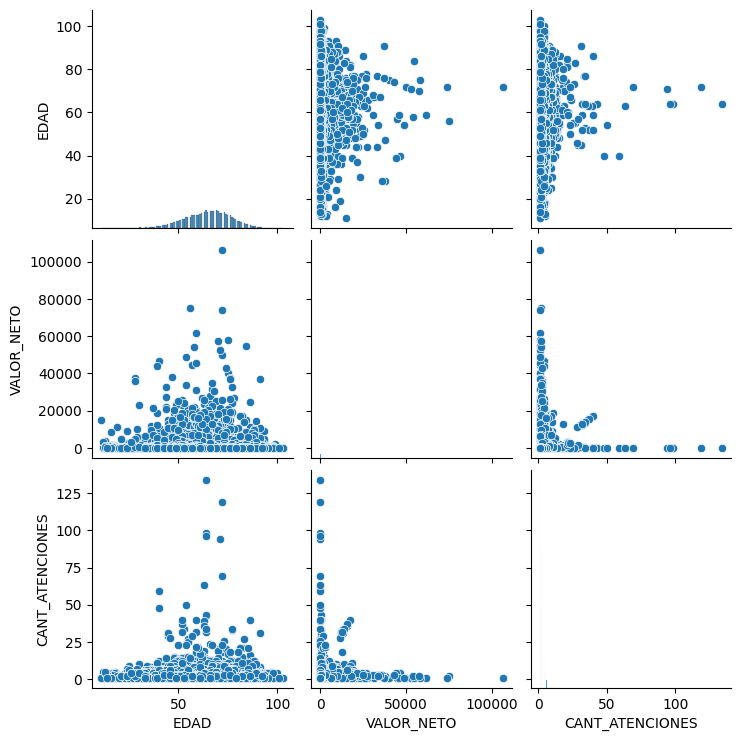

In [19]:
import seaborn as sns

data3_frac=data3[['EDAD','VALOR_NETO','CANT_ATENCIONES']].reset_index(drop=True)

# Crear el pairplot
sns.pairplot(data3_frac)

# Mostrar el pairplot
plt.show()

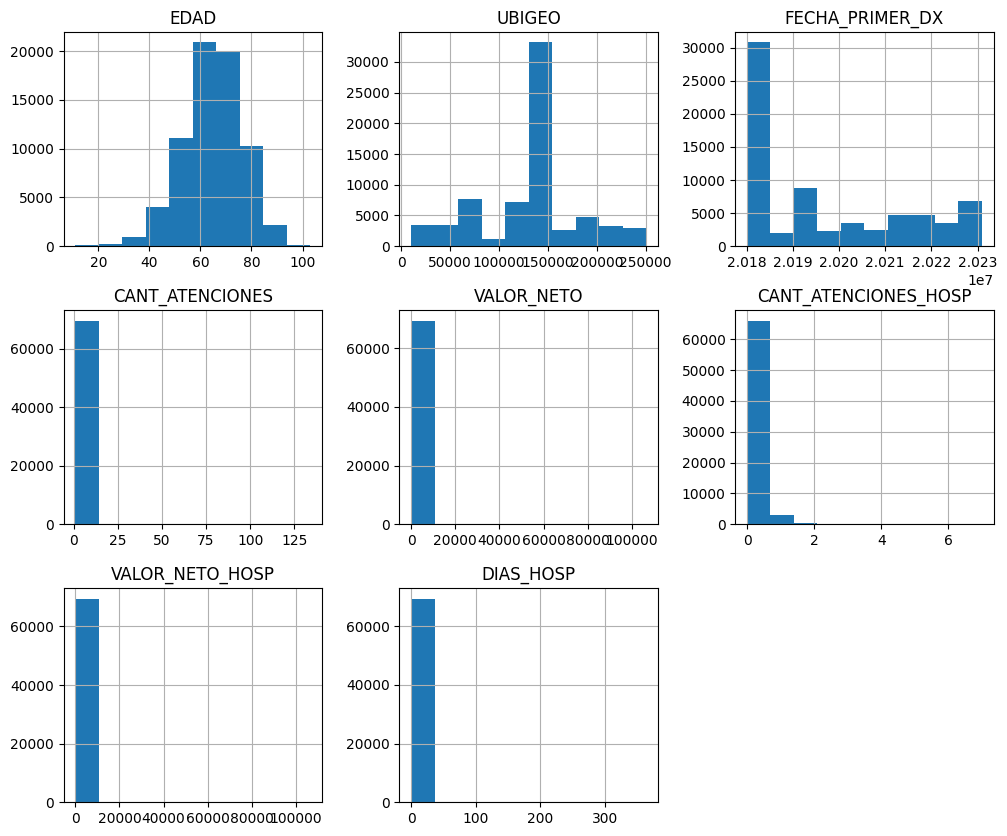

In [20]:
# carga el dataset housing
names = ['EDAD','SEXO','FECHA_PRIMER_DX','TIPO_DIABETES','CON_DX_OBESIDAD','CON_DX_HIPERTENSION','CON_DX_SALUDMENTAL','CANT_ATENCIONES','VALOR_NETO','CANT_ATENCIONES_HOSP','VALOR_NETO_HOSP','DIAS_HOSP']

# muestra la distribucion de las variables
data3.hist(figsize=[12,10])
plt.show()

In [21]:
data3=data3.drop(['UBIGEO','DEPARTAMENTO','PROVINCIA','DISTRITO'],axis=1)

In [22]:
data3

,EDAD,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP
19,67,FEMENINO,20200904,Diabetes mellitus tipo 2,SI,SI,SI,4,132.85,0,0.0,0
38,70,FEMENINO,20190313,Diabetes mellitus tipo 2,SI,SI,SI,1,0.48,0,0.0,0
50,59,FEMENINO,20180308,Diabetes mellitus no especificada,SI,SI,SI,1,7.80,0,0.0,0
74,61,MASCULINO,20180323,Diabetes mellitus tipo 2,SI,SI,SI,2,46.92,0,0.0,0
123,73,FEMENINO,20190404,Diabetes mellitus tipo 2,SI,SI,SI,1,3.96,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1735874,66,MASCULINO,20220617,Diabetes mellitus tipo 2,SI,SI,SI,3,0.00,0,0.0,0
1735897,76,FEMENINO,20180820,Diabetes mellitus tipo 2,SI,SI,SI,3,107.14,0,0.0,0
1735904,66,FEMENINO,20180521,Diabetes mellitus tipo 2,SI,SI,SI,1,0.00,0,0.0,0
1735917,53,FEMENINO,20201116,Diabetes mellitus tipo 2,SI,SI,SI,1,2.28,0,0.0,0


In [23]:
data3=encode_categorical_column(data3,['TIPO_DIABETES'],encoding_type='OneHotEncoder')

In [24]:
data3 = data3.drop(['index'], axis = 1)
data3

,EDAD,SEXO,FECHA_PRIMER_DX,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,TIPO_DIABETES_Diabetes mellitus no especificada,TIPO_DIABETES_Diabetes mellitus asociada con desnutrición,TIPO_DIABETES_Diabetes mellitus tipo 1,TIPO_DIABETES_Diabetes mellitus tipo 2,TIPO_DIABETES_Otras Diabetes mellitus especificada
0,67,FEMENINO,20200904,SI,SI,SI,4,132.85,0,0.0,0,0.0,0.0,0.0,1.0,0.0
1,70,FEMENINO,20190313,SI,SI,SI,1,0.48,0,0.0,0,0.0,0.0,0.0,1.0,0.0
2,59,FEMENINO,20180308,SI,SI,SI,1,7.80,0,0.0,0,1.0,0.0,0.0,0.0,0.0
3,61,MASCULINO,20180323,SI,SI,SI,2,46.92,0,0.0,0,0.0,0.0,0.0,1.0,0.0
4,73,FEMENINO,20190404,SI,SI,SI,1,3.96,0,0.0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69624,66,MASCULINO,20220617,SI,SI,SI,3,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0
69625,76,FEMENINO,20180820,SI,SI,SI,3,107.14,0,0.0,0,0.0,0.0,0.0,1.0,0.0
69626,66,FEMENINO,20180521,SI,SI,SI,1,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0
69627,53,FEMENINO,20201116,SI,SI,SI,1,2.28,0,0.0,0,0.0,0.0,0.0,1.0,0.0


In [25]:
data3=encode_categorical_column(data3,['SEXO'],encoding_type='OneHotEncoder')
data3 = data3.drop(['index'], axis = 1)
data3

,EDAD,FECHA_PRIMER_DX,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,TIPO_DIABETES_Diabetes mellitus no especificada,TIPO_DIABETES_Diabetes mellitus asociada con desnutrición,TIPO_DIABETES_Diabetes mellitus tipo 1,TIPO_DIABETES_Diabetes mellitus tipo 2,TIPO_DIABETES_Otras Diabetes mellitus especificada,SEXO_FEMENINO,SEXO_MASCULINO
0,67,20200904,SI,SI,SI,4,132.85,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,70,20190313,SI,SI,SI,1,0.48,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,59,20180308,SI,SI,SI,1,7.80,0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,61,20180323,SI,SI,SI,2,46.92,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,73,20190404,SI,SI,SI,1,3.96,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69624,66,20220617,SI,SI,SI,3,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
69625,76,20180820,SI,SI,SI,3,107.14,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
69626,66,20180521,SI,SI,SI,1,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
69627,53,20201116,SI,SI,SI,1,2.28,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [26]:
data3=encode_categorical_column(data3,['CON_DX_OBESIDAD'],encoding_type='OneHotEncoder')
data3 = data3.drop(['index'], axis = 1)
data3

,EDAD,FECHA_PRIMER_DX,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,TIPO_DIABETES_Diabetes mellitus no especificada,TIPO_DIABETES_Diabetes mellitus asociada con desnutrición,TIPO_DIABETES_Diabetes mellitus tipo 1,TIPO_DIABETES_Diabetes mellitus tipo 2,TIPO_DIABETES_Otras Diabetes mellitus especificada,SEXO_FEMENINO,SEXO_MASCULINO,CON_DX_OBESIDAD_SI
0,67,20200904,SI,SI,4,132.85,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,70,20190313,SI,SI,1,0.48,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,59,20180308,SI,SI,1,7.80,0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,61,20180323,SI,SI,2,46.92,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,73,20190404,SI,SI,1,3.96,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69624,66,20220617,SI,SI,3,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
69625,76,20180820,SI,SI,3,107.14,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
69626,66,20180521,SI,SI,1,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
69627,53,20201116,SI,SI,1,2.28,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [27]:
data3=encode_categorical_column(data3,['CON_DX_HIPERTENSION'],encoding_type='OneHotEncoder')
data3 = data3.drop(['index'], axis = 1)
data3

,EDAD,FECHA_PRIMER_DX,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,TIPO_DIABETES_Diabetes mellitus no especificada,TIPO_DIABETES_Diabetes mellitus asociada con desnutrición,TIPO_DIABETES_Diabetes mellitus tipo 1,TIPO_DIABETES_Diabetes mellitus tipo 2,TIPO_DIABETES_Otras Diabetes mellitus especificada,SEXO_FEMENINO,SEXO_MASCULINO,CON_DX_OBESIDAD_SI,CON_DX_HIPERTENSION_SI
0,67,20200904,SI,4,132.85,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,70,20190313,SI,1,0.48,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,59,20180308,SI,1,7.80,0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,61,20180323,SI,2,46.92,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,73,20190404,SI,1,3.96,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69624,66,20220617,SI,3,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
69625,76,20180820,SI,3,107.14,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
69626,66,20180521,SI,1,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
69627,53,20201116,SI,1,2.28,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [28]:
data3=encode_categorical_column(data3,['CON_DX_SALUDMENTAL'],encoding_type='OneHotEncoder')

In [29]:
data3 = data3.drop(['index'], axis = 1)
data3

,EDAD,FECHA_PRIMER_DX,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,TIPO_DIABETES_Diabetes mellitus no especificada,TIPO_DIABETES_Diabetes mellitus asociada con desnutrición,TIPO_DIABETES_Diabetes mellitus tipo 1,TIPO_DIABETES_Diabetes mellitus tipo 2,TIPO_DIABETES_Otras Diabetes mellitus especificada,SEXO_FEMENINO,SEXO_MASCULINO,CON_DX_OBESIDAD_SI,CON_DX_HIPERTENSION_SI,CON_DX_SALUDMENTAL_SI
0,67,20200904,4,132.85,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,70,20190313,1,0.48,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,59,20180308,1,7.80,0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,61,20180323,2,46.92,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,73,20190404,1,3.96,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69624,66,20220617,3,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
69625,76,20180820,3,107.14,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
69626,66,20180521,1,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
69627,53,20201116,1,2.28,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['EDAD'].plot(kind='hist', bins=20, title='EDAD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['FECHA_PRIMER_DX'].plot(kind='hist', bins=20, title='FECHA_PRIMER_DX')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['CANT_ATENCIONES'].plot(kind='hist', bins=20, title='CANT_ATENCIONES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='EDAD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='EDAD', y='FECHA_PRIMER_DX', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='FECHA_PRIMER_DX', y='CANT_ATENCIONES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='CANT_ATENCIONES', y='VALOR_NETO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['EDAD']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('EDAD')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['FECHA_PRIMER_DX']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('FECHA_PRIMER_DX')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['CANT_ATENCIONES']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('CANT_ATENCIONES')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['VALOR_NETO']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('VALOR_NETO')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['EDAD'].plot(kind='line', figsize=(8, 4), title='EDAD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['FECHA_PRIMER_DX'].plot(kind='line', figsize=(8, 4), title='FECHA_PRIMER_DX')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['CANT_ATENCIONES'].plot(kind='line', figsize=(8, 4), title='CANT_ATENCIONES')
plt.gca().spines[['top', 'right']].set_visible(False)

In [48]:
data3

,EDAD,FECHA_PRIMER_DX,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,TIPO_DIABETES_Diabetes mellitus no especificada,TIPO_DIABETES_Diabetes mellitus asociada con desnutrición,TIPO_DIABETES_Diabetes mellitus tipo 1,TIPO_DIABETES_Diabetes mellitus tipo 2,TIPO_DIABETES_Otras Diabetes mellitus especificada,SEXO_FEMENINO,SEXO_MASCULINO,CON_DX_OBESIDAD_SI,CON_DX_HIPERTENSION_SI,CON_DX_SALUDMENTAL_SI
0,67,20200904,4,132.85,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,70,20190313,1,0.48,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,59,20180308,1,7.80,0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,61,20180323,2,46.92,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,73,20190404,1,3.96,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69624,66,20220617,3,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
69625,76,20180820,3,107.14,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
69626,66,20180521,1,0.00,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
69627,53,20201116,1,2.28,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [30]:
# prompt: Con DataFrame data3: saca los nombres de las columnas y almacénalas en la variable "names"

names = data3.columns.to_list()


In [31]:
names

['EDAD',
 'FECHA_PRIMER_DX',
 'CANT_ATENCIONES',
 'VALOR_NETO',
 'CANT_ATENCIONES_HOSP',
 'VALOR_NETO_HOSP',
 'DIAS_HOSP',
 'TIPO_DIABETES_Diabetes mellitus  no especificada',
 'TIPO_DIABETES_Diabetes mellitus asociada con desnutrición',
 'TIPO_DIABETES_Diabetes mellitus tipo 1',
 'TIPO_DIABETES_Diabetes mellitus tipo 2',
 'TIPO_DIABETES_Otras Diabetes mellitus especificada',
 'SEXO_FEMENINO',
 'SEXO_MASCULINO',
 'CON_DX_OBESIDAD_SI',
 'CON_DX_HIPERTENSION_SI',
 'CON_DX_SALUDMENTAL_SI']

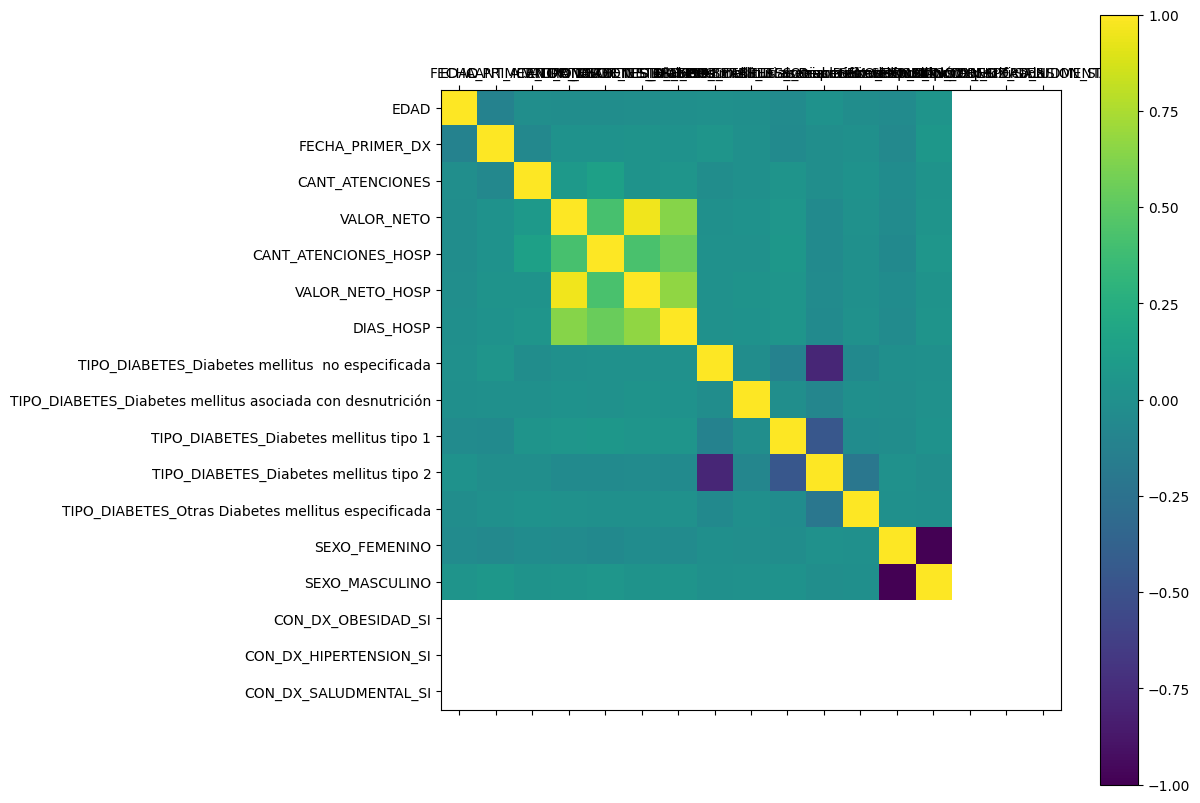

In [32]:

# plotea la matriz de correlacion
correlations = data3.corr()
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,17,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# Modeling

In [44]:
X=data3.drop(['VALOR_NETO'],axis=1)
Y=data3['VALOR_NETO'].copy()

"""### Separando la data en training - validacion"""

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

In [34]:
"""## Modeling"""

xgb_params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.01,
    'max_depth': 3,
    'n_estimators': 1000
}

model = xgb.XGBRegressor(**xgb_params)

model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
# Definimos el pool de algoritmos de ML a evaluar
algos = []
#adjuntar con el formato (Nombre, Modelo)
algos.append(('LinearReg', LinearRegression( )))
algos.append(('Ridge', Ridge( )))
algos.append(('Lasso', Lasso()))
algos.append(('ElasticNet', ElasticNet()))
algos.append(('KNN', KNeighborsRegressor( n_neighbors=10)))
algos.append(('DT', DecisionTreeRegressor(max_depth=10)))

In [39]:
from sklearn.model_selection import KFold # para partir la data en k-folds
from sklearn.model_selection import cross_val_score # para evaluar algoritmos en cross validacion

# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
kfold = KFold(n_splits=10, random_state=42, shuffle= True) # especifica el particionador de datos a 10-folds CV

#  valua cada algoritmo
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')  #r2 neg_mean_squared_error #completar
    results.append(cv_results)
    names.append(algoname)

    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LinearReg: -171049.52277501527 (122323.53637544796)
Ridge: -171049.06730565123 (122323.6583053219)
Lasso: -170982.17199240482 (122306.38817449252)
ElasticNet: -170725.18517104874 (122738.627022963)
KNN: -271229.72806612693 (163853.14541500207)
DT: -216948.12802309898 (144772.31123505672)


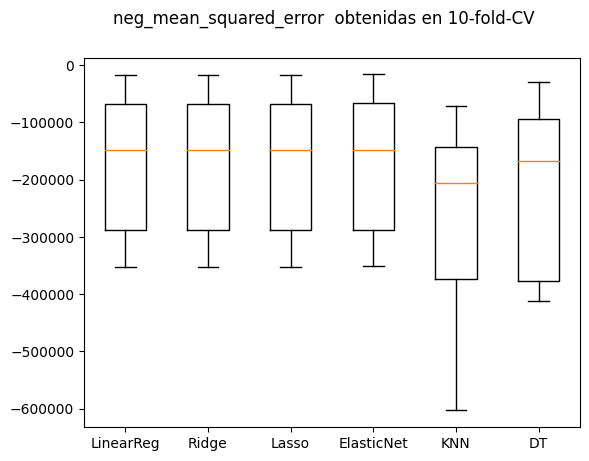

In [40]:
# Muestra graficamente los resultados de neg_mean_absolute_error  en crossvalidacion de los Algoritmos evaluados

fig = plt.figure()
fig.suptitle('neg_mean_squared_error  obtenidas en 10-fold-CV')
ax = fig.add_subplot(1,1,1)
plt.boxplot(results) ##Completar
ax.set_xticklabels(names) ##Completar
plt.show()

In [41]:
 # Codigo para escoger el algoritmo que tenga el mejor promedio de la metrica en crosvalidacion.
ind = 0
best_metric = -np.inf
best_ind = 0

for result in results:
    current_metric = np.mean(results[ind])
    #Complete la lógica
    if current_metric > best_metric:
      #actualice los valores
      best_metric = current_metric
      best_ind = ind
    ind += 1

print('algoritmo con mejor promedio de la metrica: ', names[best_ind])
print('mejor metrica promedio: ', best_metric)

algoritmo con mejor promedio de la metrica:  ElasticNet
mejor metrica promedio:  -170725.18517104874


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error   # para manejar metricas de desempeño
from sklearn.metrics import explained_variance_score  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import r2_score  # para manejar matrices de confusion

# Reentrena modelo con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model = ElasticNet()
model.fit(X_train,Y_train)
y_predicted =model.predict(X_test)

print("Mean squared error:", mean_squared_error(Y_test, y_predicted))##
print("Mean absolute error:", mean_absolute_error(Y_test, y_predicted))##
print("Explained variance score:",explained_variance_score(Y_test, y_predicted) )##
print("R2 score:", r2_score(Y_test, y_predicted))##

Mean squared error: 166903.2196948042
Mean absolute error: 87.96188475837053
Explained variance score: 0.9276173739786061
R2 score: 0.9276145773705329


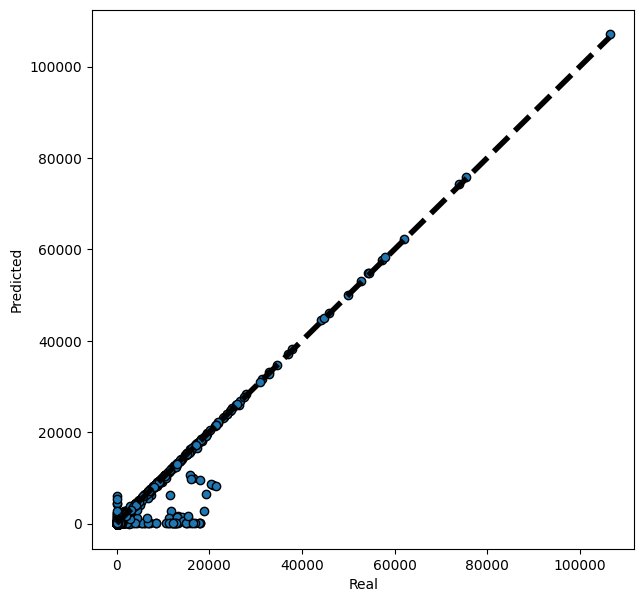

In [47]:
#Código para generar el scatter plot
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(Y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()